<a href="https://colab.research.google.com/github/alvarosello/data-science-training/blob/main/Reproducir_grafico_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nos basaremos en una de tus tareas de un ejercicio anterior.

El conjunto de datos que se te da aquí es el conjunto de datos de hipoteca usado anteriormente en este curso. Tu meta es reproducir un gráfico.  No te preocupes si el gráfico luce exactamente igual. Es posible que puedas crear un gráfico más placentero a la vista e informativo a la vez. La línea negra es la hipoteca de 30 años al 5% y la línea azul es al 3%. Lo que está graficado es el interés acumulado pagado en el transcurso del préstamo. 

Pista: plt.xticks(fontsize = 15) y plt.yticks(fontsize = 15) podrían ser útiles para hacer los tics más grandes. 

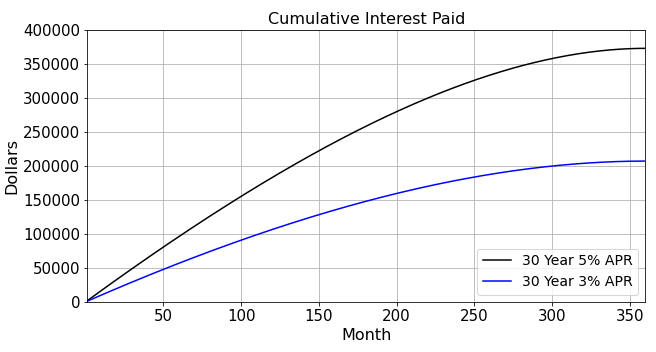

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
filename = '/content/drive/MyDrive/Coding Dojo/PTDataScience/PandasParaManipulaciónDeDatos/mortgages.csv'
df = pd.read_csv(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [5]:
# Generamos filtros de acuerdo a lo solicitado
hipoteca30a = df['Mortgage Name'] == '30 Year'
int3porciento = df['Interest Rate'] == 0.03
int5porciento = df['Interest Rate'] == 0.05

In [6]:
# Ahora generamos filtros de hipoteca de 30 años con las respectivas tasas de interés
hipoteca30_03 = df.loc[hipoteca30a & int3porciento,: ]
hipoteca30_05 = df.loc[hipoteca30a & int5porciento,: ]

In [7]:
# Usamos cumsum() para obtener la suma acumulada de los intereses pagados para la hipoteca de 30 años a un 3% de interés
hipoteca30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [8]:
# Usamos cumsum() para obtener la suma acumulada de los intereses pagados para la hipoteca de 30 años a un 5% de interés
hipoteca30_05['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

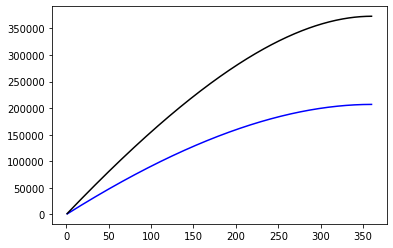

In [9]:
plt.plot(hipoteca30_03['Month'], hipoteca30_03['Interest Paid'].cumsum(), c = 'b')
plt.plot(hipoteca30_05['Month'], hipoteca30_05['Interest Paid'].cumsum(), c = 'k');

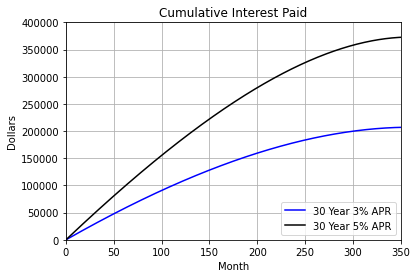

In [30]:
plt.plot(hipoteca30_03['Month'], hipoteca30_03['Interest Paid'].cumsum(), c = 'b', label = '30 Year 3% APR')
plt.plot(hipoteca30_05['Month'], hipoteca30_05['Interest Paid'].cumsum(), c = 'k', label = '30 Year 5% APR')
plt.xlim(left=0, right=350)
plt.ylim(bottom=0,top=400000)
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.title('Cumulative Interest Paid')
plt.legend(loc="lower right")
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15) 
plt.grid()